# Exploratory data anlysis
- what types of data
    - mixed? privacy suppressed causing issues - temporarily replace with -1 to get columns to read
    - a few date columns
    - OPEID can have letters in it
    - OPEID6 never has letters
    - UNITID might be useful as an index
- what types of nulls and how to handle
    - privacy suppressed - swap for np.nan
    - actual null
- what do column labels mean - data dictionary in YAML but not always very descriptive

### Possible analyses from this data
- cluster similar universities based on various cost dimensions - ROOMBOARD, BOOKS, TUIT
- chart trends over time for TCNJ (and forecast)
    - TUITION_IN
    - ROOMBOARD, BOOKS
- compare earnings to cost dimensions for each university (value for money)
- metrics for 1st generation students: what is similar across institutions
- compare median earnings for fields of study at tcnj to other colleges with same degrees

In [1]:
import os
import pandas as pd
import pathlib
import sqlalchemy as sa
import highered as h
import numpy as np
pd.set_option('display.max_colwidth', 100)

In [2]:
db = sa.create_engine('sqlite:///ignoredir/highered.sqlite')

In [3]:
tcnj_opeid = '00264200'
tcnj_opeid6 = 2642 #need to convert to int for opeid6

In [4]:
p = pathlib.Path('./ignoredir')
p

WindowsPath('ignoredir')

In [5]:
#util functions
def get_col_info(colname, colsource = 'source', map='all'):
    #get info about a column
    ret= datadf[datadf[colsource].str.contains(colname, flags=2).fillna(False)]
    if map=='program':
        ret = ret[ret['map'] == 'program']
    return ret

In [335]:
get_col_info('tuit',)[['source', 'description', 'map']]

,source,description,map
378,TUITIONFEE_IN,In-state tuition and fees,None
379,TUITIONFEE_OUT,Out-of-state tuition and fees,None
380,TUITIONFEE_PROG,Tuition and fees for program-year institutions,None
381,TUITFTE,Net tuition revenue per full-time equivalent student,None


# metdata
*NOTE: Field of Study columns have P_ (for 'program data' mapping from files) prepended to the column name and won't show up if you search for an exact match

In [11]:
datadf = pd.read_sql('select * from dictionary', db)
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2578 non-null   object
 1   source       2485 non-null   object
 2   type         2550 non-null   object
 3   description  2569 non-null   object
 4   index        75 non-null     object
 5   lvl_0        2 non-null      object
 6   lvl_1        2 non-null      object
 7   lvl_2        2 non-null      object
 8   lvl_3        2 non-null      object
 9   lvl_4        2 non-null      object
 10  map          92 non-null     object
 11  calculate    93 non-null     object
dtypes: object(12)
memory usage: 241.8+ KB


In [246]:
datadf['sourcep_'] = datadf['source'].str.replace('^P_', '')

In [248]:
datadf[datadf['map'].notnull()]

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata,sourcep_
2392,programs.cip_4_digit.unit_id,P_UNITID,integer,Unit ID for institution,None,None,None,None,None,None,program,None,False,False,UNITID
2393,programs.cip_4_digit.ope6_id,P_OPEID6,None,6-digit OPE ID for institution,None,None,None,None,None,None,program,None,False,False,OPEID6
2394,programs.cip_4_digit.school.name,P_INSTNM,autocomplete,Institution name,None,None,None,None,None,None,program,None,False,False,INSTNM
2395,programs.cip_4_digit.school.type,P_CONTROL,integer,Control of institution,None,None,None,None,None,None,program,None,False,False,CONTROL
2396,programs.cip_4_digit.school.main_campus,P_MAIN,integer,Flag for main campus,None,None,None,None,None,None,program,None,False,False,MAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,programs.cip_4_digit.repayment.2_yr_bb_fed_comp.deferment,P_BBRR2_FED_COMP_DFR,float,Percentage of undergraduate completer undergraduate federal student loan borrowers in deferment after 2 years,None,None,None,None,None,None,program,None,False,False,BBRR2_FED_COMP_DFR
2480,programs.cip_4_digit.repayment.2_yr_bb_fed_comp.noprogress,P_BBRR2_FED_COMP_NOPROG,float,Percentage of undergraduate completer undergraduate federal student loan borrowers not making progress after 2 years,None,None,None,None,None,None,program,None,False,False,BBRR2_FED_COMP_NOPROG
2481,programs.cip_4_digit.repayment.2_yr_bb_fed_comp.makingprogress,P_BBRR2_FED_COMP_MAKEPROG,float,Percentage of undergraduate completer undergraduate federal student loan borrowers making progress after 2 years,None,None,None,None,None,None,program,None,False,False,BBRR2_FED_COMP_MAKEPROG
2482,programs.cip_4_digit.repayment.2_yr_bb_fed_comp.fullypaid,P_BBRR2_FED_COMP_PAIDINFULL,float,Percentage of undergraduate completer undergraduate federal student loan borrowers paid in full after 2 years,None,None,None,None,None,None,program,None,False,False,BBRR2_FED_COMP_PAIDINFULL


In [9]:
filedf = pd.read_sql('select * from files', db)
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    28 non-null     object
 1   key     28 non-null     object
 2   map     4 non-null      object
dtypes: object(3)
memory usage: 800.0+ bytes


In [10]:
exampledf = pd.read_sql('select * from examples', db)
exampledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         10 non-null     object
 1   description  10 non-null     object
 2   params       10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [12]:
exampledf

,name,description,params
0,College Scorecard Search results,the default scorecard universe,'/v1/schools?page=0&sort=latest.completion.consumer_rate
1,Completion Rate,"schools with a graduation rate of 95% and above, sorted descending, displaying name and student ...",'/v1/schools?latest.completion.rate_suppressed.overall__range=0.95..&_fields=latest.completion.r...
2,"Two and four year schools, sorted by cost","Using the ""predominant degree"" at a school, showing name & cost, sorted by cost","'/v1/schools?school.degrees_awarded.predominant__range=2..3&_fields=school.name,id,latest.cost.a..."
3,Four Year School with over 2000 students,"compare admission rate and completion rate, showing size and school identifying information","'/v1/schools?school.degrees_awarded.predominant=3&latest.student.size__range=2000..&_fields=id,l..."
4,SF Bay Schools,"within 100mi of SF (include name, id)","'/v1/schools?_zip=91423&_distance=100mi&_fields=school.name,id,latest.earnings.6_yrs_after_entry..."
5,lowest tercile earnings,"mean earnings, lowest tercile, sort descending (include name, id)","'/v1/schools?_fields=school.name,id,latest.earnings.6_yrs_after_entry.mean_earnings.lowest_terci..."
6,median earnings,"median earnings, sort descending (include name, id)","'/v1/schools?_fields=school.name,id,latest.earnings.10_yrs_after_entry.median&_sort=latest.earni..."
7,average net price,display school name and cost by average net price descending,"'/v1/schools?_fields=latest.cost.avg_net_price.overall,school.name,latest.student.size&_sort=lat..."
8,Miami Dade College,show school data for all years by id,'/v1/schools?id=135717&all_years=true'
9,Arizona State University,show school data for all years by id,'/v1/schools?id=104151&all_years=true'


# files
field of study has a non-null of program_data in map field.  Merged (All Data) files have nulls in map column

In [33]:
filedf

,name,key,map
0,Most-Recent-Cohorts-All-Data-Elements.csv,latest,None
1,Most-Recent-Cohorts-Field-of-Study.csv,latest,program_data
2,MERGED2019_20_PP.csv,2019,None
3,MERGED2018_19_PP.csv,2018,None
4,MERGED2017_18_PP.csv,2017,None
5,FieldOfStudyData1617_1718_PP.csv,2017,program_data
6,MERGED2016_17_PP.csv,2016,None
7,FieldOfStudyData1516_1617_PP.csv,2016,program_data
8,MERGED2015_16_PP.csv,2015,None
9,FieldOfStudyData1415_1516_PP.csv,2015,program_data


In [43]:
{x.strip() for x in filedf['name'].unique()}#create set = sorted and deduped
#[filedf['name'].str.contains("merged|all-data", flags=2)]

{'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2019_20_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv'}

# shared data between file categories

In [250]:
datadf['in_FOS'] = datadf['sourcep_'].isin(fosdf.columns)

In [249]:
datadf['in_alldata'] = datadf['sourcep_'].isin(alldatadf.columns)

In [253]:
datadf.query("in_FOS == True and in_alldata == True")

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata,sourcep_
0,id,UNITID,integer,Unit ID for institution,None,None,None,None,None,None,None,None,True,True,UNITID
2,ope6_id,OPEID6,None,6-digit OPE ID for institution,varchar(10),None,None,None,None,None,None,None,True,True,OPEID6
3,school.name,INSTNM,autocomplete,Institution name,fulltext,None,None,None,None,None,None,None,True,True,INSTNM
12,school.main_campus,MAIN,integer,Flag for main campus,tinyint,None,None,None,None,None,None,None,True,True,MAIN
16,school.ownership,CONTROL,integer,Control of institution,integer,None,None,None,None,None,None,None,True,True,CONTROL
2392,programs.cip_4_digit.unit_id,P_UNITID,integer,Unit ID for institution,None,None,None,None,None,None,program,None,True,True,UNITID
2393,programs.cip_4_digit.ope6_id,P_OPEID6,None,6-digit OPE ID for institution,None,None,None,None,None,None,program,None,True,True,OPEID6
2394,programs.cip_4_digit.school.name,P_INSTNM,autocomplete,Institution name,None,None,None,None,None,None,program,None,True,True,INSTNM
2395,programs.cip_4_digit.school.type,P_CONTROL,integer,Control of institution,None,None,None,None,None,None,program,None,True,True,CONTROL
2396,programs.cip_4_digit.school.main_campus,P_MAIN,integer,Flag for main campus,None,None,None,None,None,None,program,None,True,True,MAIN


In [132]:
'CITY' in fosdf.columns

False

In [258]:
get_col_info('CONTROL', colsource='sourcep_')

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata,sourcep_
16,school.ownership,CONTROL,integer,Control of institution,integer,None,None,None,None,None,None,None,True,True,CONTROL
2395,programs.cip_4_digit.school.type,P_CONTROL,integer,Control of institution,None,None,None,None,None,None,program,None,True,True,CONTROL


# Field of Study

In [46]:
fosdf = h.get_csv_from_zipfile(h.ZIPNAME, 'Most-Recent-Cohorts-Field-of-Study.csv')
fosdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260531 entries, 0 to 260530
Data columns (total 92 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UNITID                         253808 non-null  float64
 1   OPEID6                         260531 non-null  int64  
 2   INSTNM                         260531 non-null  object 
 3   CONTROL                        260531 non-null  object 
 4   MAIN                           260531 non-null  int64  
 5   CIPCODE                        260531 non-null  int64  
 6   CIPDESC                        260531 non-null  object 
 7   CREDLEV                        260531 non-null  int64  
 8   CREDDESC                       260531 non-null  object 
 9   IPEDSCOUNT1                    187439 non-null  float64
 10  IPEDSCOUNT2                    189508 non-null  float64
 11  DEBT_ALL_STGP_ANY_N            260531 non-null  object 
 12  DEBT_ALL_STGP_ANY_MEAN        

In [118]:
fosdf.describe(include=np.object)

,INSTNM,CONTROL,CIPDESC,CREDDESC
count,260531,260531,260531,260531
unique,7643,4,403,8
top,Pennsylvania State University-Main Campus,Public,"Business Administration, Management and Operations.",Bachelors Degree
freq,477,146260,8004,84489


In [119]:
fosdf.describe()

,UNITID,OPEID6,MAIN,CIPCODE,CREDLEV,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_STGP_ANY_N,DEBT_ALL_STGP_ANY_MEAN,DEBT_ALL_STGP_ANY_MDN,...,EARN_MDN_HI_2YR,BBRR2_FED_COMP_N,BBRR2_FED_COMP_DFLT,BBRR2_FED_COMP_DLNQ,BBRR2_FED_COMP_FBR,BBRR2_FED_COMP_DFR,BBRR2_FED_COMP_NOPROG,BBRR2_FED_COMP_MAKEPROG,BBRR2_FED_COMP_PAIDINFULL,BBRR2_FED_COMP_DISCHARGE
count,253808.000000,260531.000000,260531.000000,260531.000000,260531.000000,187439.000000,189508.000000,260531.000000,260531.000000,260531.000000,...,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000
mean,229004.197137,7212.243975,0.782460,3332.031524,3.230284,27.414924,27.580292,22.928189,3312.006264,3874.854620,...,9893.899594,43.623791,-0.965571,-0.968980,-0.881874,-0.925558,-0.793960,-0.815259,-0.951231,-0.990475
std,111307.470839,9297.948887,0.412574,1726.545164,1.840611,89.078893,92.043463,195.544903,8613.254930,9462.491435,...,20279.934237,257.620965,0.192424,0.179406,0.367099,0.283612,0.487388,0.461850,0.230511,0.098709
min,100654.000000,1002.000000,0.000000,100.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,155627.000000,2167.000000,1.000000,1419.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,199102.000000,3316.000000,1.000000,4005.000000,3.000000,8.000000,8.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,233301.000000,7329.000000,1.000000,5107.000000,5.000000,24.000000,24.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,16.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,493460.000000,42817.000000,1.000000,6126.000000,8.000000,8089.000000,8561.000000,10504.000000,54029.000000,57500.000000,...,248619.000000,9621.000000,0.488889,0.238095,0.609375,0.767442,0.863248,0.830769,0.687500,0.228261


In [49]:
fosdf['DEBT_MALE_STGP_ANY_MEAN'].value_counts()

PrivacySuppressed    244278
33626                    46
30175                    34
33306                    34
36564                    34
                      ...  
22488                     1
10720                     1
25452                     1
16833                     1
24583                     1
Name: DEBT_MALE_STGP_ANY_MEAN, Length: 9245, dtype: int64

In [51]:
fosdf = h.df_from_zipcsv(h.ZIPNAME, 'Most-Recent-Cohorts-Field-of-Study.csv')

In [52]:
fosdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260531 entries, 0 to 260530
Data columns (total 92 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UNITID                         253808 non-null  float64
 1   OPEID6                         260531 non-null  int64  
 2   INSTNM                         260531 non-null  object 
 3   CONTROL                        260531 non-null  object 
 4   MAIN                           260531 non-null  int64  
 5   CIPCODE                        260531 non-null  int64  
 6   CIPDESC                        260531 non-null  object 
 7   CREDLEV                        260531 non-null  int64  
 8   CREDDESC                       260531 non-null  object 
 9   IPEDSCOUNT1                    187439 non-null  float64
 10  IPEDSCOUNT2                    189508 non-null  float64
 11  DEBT_ALL_STGP_ANY_N            260531 non-null  int64  
 12  DEBT_ALL_STGP_ANY_MEAN        

In [55]:
fosdf.describe()

,UNITID,OPEID6,MAIN,CIPCODE,CREDLEV,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_STGP_ANY_N,DEBT_ALL_STGP_ANY_MEAN,DEBT_ALL_STGP_ANY_MDN,...,EARN_MDN_HI_2YR,BBRR2_FED_COMP_N,BBRR2_FED_COMP_DFLT,BBRR2_FED_COMP_DLNQ,BBRR2_FED_COMP_FBR,BBRR2_FED_COMP_DFR,BBRR2_FED_COMP_NOPROG,BBRR2_FED_COMP_MAKEPROG,BBRR2_FED_COMP_PAIDINFULL,BBRR2_FED_COMP_DISCHARGE
count,253808.000000,260531.000000,260531.000000,260531.000000,260531.000000,187439.000000,189508.000000,260531.000000,260531.000000,260531.000000,...,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000,260531.000000
mean,229004.197137,7212.243975,0.782460,3332.031524,3.230284,27.414924,27.580292,22.928189,3312.006264,3874.854620,...,9893.899594,43.623791,-0.965571,-0.968980,-0.881874,-0.925558,-0.793960,-0.815259,-0.951231,-0.990475
std,111307.470839,9297.948887,0.412574,1726.545164,1.840611,89.078893,92.043463,195.544903,8613.254930,9462.491435,...,20279.934237,257.620965,0.192424,0.179406,0.367099,0.283612,0.487388,0.461850,0.230511,0.098709
min,100654.000000,1002.000000,0.000000,100.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,155627.000000,2167.000000,1.000000,1419.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,199102.000000,3316.000000,1.000000,4005.000000,3.000000,8.000000,8.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,233301.000000,7329.000000,1.000000,5107.000000,5.000000,24.000000,24.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,16.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,493460.000000,42817.000000,1.000000,6126.000000,8.000000,8089.000000,8561.000000,10504.000000,54029.000000,57500.000000,...,248619.000000,9621.000000,0.488889,0.238095,0.609375,0.767442,0.863248,0.830769,0.687500,0.228261


In [190]:
#number of privacy suppressed values in the whole table
(fosdf==-1).sum().sum()

19229786

In [191]:
fosdf2 = fosdf.replace(-1, np.nan)

In [136]:
fosdf[fosdf['OPEID6'] == 2642]

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_MDN_HI_2YR,BBRR2_FED_COMP_N,BBRR2_FED_COMP_DFLT,BBRR2_FED_COMP_DLNQ,BBRR2_FED_COMP_FBR,BBRR2_FED_COMP_DFR,BBRR2_FED_COMP_NOPROG,BBRR2_FED_COMP_MAKEPROG,BBRR2_FED_COMP_PAIDINFULL,BBRR2_FED_COMP_DISCHARGE
106755,187134.0,2642,The College of New Jersey,Public,1,502,"Ethnic, Cultural Minority, Gender, and Group Studies.",3,Bachelors Degree,9.0,...,-1,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106756,187134.0,2642,The College of New Jersey,Public,1,502,"Ethnic, Cultural Minority, Gender, and Group Studies.",8,Graduate/Professional Certificate,0.0,...,-1,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106757,187134.0,2642,The College of New Jersey,Public,1,901,Communication and Media Studies.,3,Bachelors Degree,96.0,...,41705,86,-1.0,-1.0,-1.0,-1.000000,0.139535,0.593023,-1.000000,-1.0
106758,187134.0,2642,The College of New Jersey,Public,1,904,Journalism.,3,Bachelors Degree,24.0,...,-1,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106759,187134.0,2642,The College of New Jersey,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,31.0,...,70009,18,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106760,187134.0,2642,The College of New Jersey,Public,1,1301,"Education, General.",5,Master's Degree,0.0,...,55693,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106761,187134.0,2642,The College of New Jersey,Public,1,1302,"Bilingual, Multilingual, and Multicultural Education.",8,Graduate/Professional Certificate,23.0,...,64493,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106762,187134.0,2642,The College of New Jersey,Public,1,1304,Educational Administration and Supervision.,3,Bachelors Degree,19.0,...,-1,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106763,187134.0,2642,The College of New Jersey,Public,1,1304,Educational Administration and Supervision.,5,Master's Degree,103.0,...,62632,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
106764,187134.0,2642,The College of New Jersey,Public,1,1304,Educational Administration and Supervision.,8,Graduate/Professional Certificate,8.0,...,-1,-1,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0


In [177]:
fosdf['CIPDESC'].value_counts()

Business Administration, Management and Operations.                                   8004
Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.    5925
Accounting and Related Services.                                                      5442
Health and Medical Administrative Services.                                           5307
Criminal Justice and Corrections.                                                     4993
                                                                                      ... 
English Literature (British and Commonwealth).                                           1
Creative Writing.                                                                        1
Social Psychology.                                                                       1
Developmental and Child Psychology.                                                      1
Internal Medicine Residency/Fellowship Programs.                                         1

In [195]:
get_col_info('P_EARN_MDN')

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata
2469,programs.cip_4_digit.earnings.highest.1_yr.overall_median_earnings,P_EARN_MDN_HI_1YR,integer,Median earnings of graduates working and not enrolled 1 year after completing highest credential,None,None,None,None,None,None,program,None,False,False
2473,programs.cip_4_digit.earnings.highest.2_yr.overall_median_earnings,P_EARN_MDN_HI_2YR,integer,Median earnings of graduates working and not enrolled 2 years after completing highest credential,integer,None,None,None,None,None,program,None,False,False


In [201]:
#degrees that make the most money 1 yr after graduation
fosdf2.groupby('CIPDESC')['EARN_MDN_HI_1YR'].mean().sort_values(ascending=False).head(10)

CIPDESC
Dental Residency Programs.                                188965.500000
Advanced/Graduate Dentistry and Oral Sciences.            182355.750000
Medical Clinical Sciences/Graduate Medical Studies.       146186.666667
Dentistry.                                                108693.681159
Pharmacy, Pharmaceutical Sciences, and Administration.    103505.994253
Optometry.                                                 99638.238095
Operations Research.                                       97417.000000
Systems Engineering.                                       92144.921053
Veterinary Medicine.                                       82640.085714
Mathematics and Computer Science.                          81455.000000
Name: EARN_MDN_HI_1YR, dtype: float64

In [209]:
import seaborn

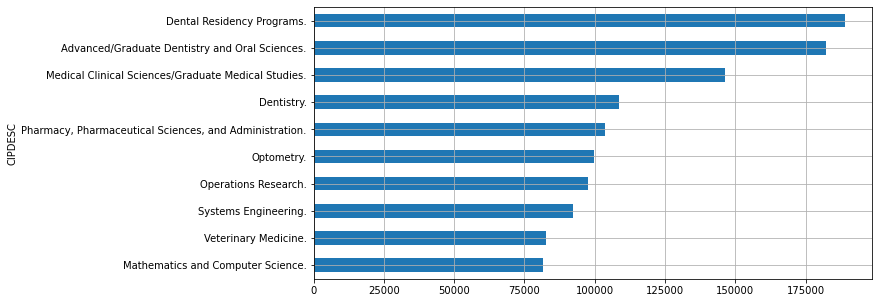

In [291]:
ax = fosdf2.groupby('CIPDESC')['EARN_MDN_HI_1YR'].mean().sort_values(ascending=False).head(10).sort_values().plot.barh(figsize=(10,5), grid=True)
ax.ylabel=""

In [288]:
#degrees that make the most money 2 yrs after graduation
fosdf2.groupby('CIPDESC')['EARN_MDN_HI_2YR'].mean().sort_values(ascending=False).head(10)

CIPDESC
Advanced/Graduate Dentistry and Oral Sciences.            183509.972222
Dental Residency Programs.                                182336.333333
Medical Clinical Sciences/Graduate Medical Studies.       132056.200000
Dentistry.                                                109775.086957
Pharmacy, Pharmaceutical Sciences, and Administration.    105141.666667
Optometry.                                                 94744.476190
Systems Engineering.                                       92974.371429
Real Estate Development.                                   90125.666667
Nuclear Engineering Technologies/Technicians.              88567.400000
Operations Research.                                       85328.000000
Name: EARN_MDN_HI_2YR, dtype: float64

In [305]:
get_col_info('EARN_MDN_HI_2YR', map='program')

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata,sourcep_
2473,programs.cip_4_digit.earnings.highest.2_yr.overall_median_earnings,P_EARN_MDN_HI_2YR,integer,Median earnings of graduates working and not enrolled 2 years after completing highest credential,integer,None,None,None,None,None,program,None,True,False,EARN_MDN_HI_2YR


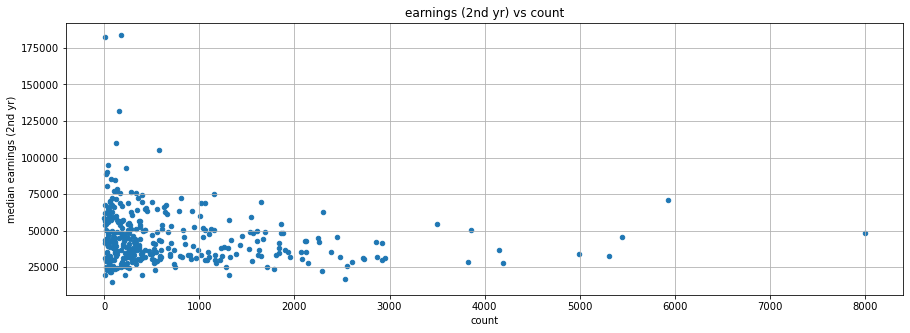

In [287]:
#degrees that make the most money 2 yrs after graduation
earn2yr = fosdf2.groupby('CIPDESC').agg({'EARN_MDN_HI_2YR':(np.mean,len), })
earn2yr.columns = ['median earnings (2nd yr)', 'count']
ax = earn2yr.plot.scatter(x='count', y='median earnings (2nd yr)', figsize=(15,5), grid=True, title = 'earnings (2nd yr) vs count')

In [290]:
earn2yr.query("count > 5000").style.format({'median earnings (2nd yr)':"{:,.0f}"})

,median earnings (2nd yr),count
CIPDESC,,
Accounting and Related Services.,"45,998",5442.000000
"Business Administration, Management and Operations.","48,228",8004.000000
Health and Medical Administrative Services.,"32,801",5307.000000
"Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.","70,645",5925.000000


<AxesSubplot:ylabel='Frequency'>

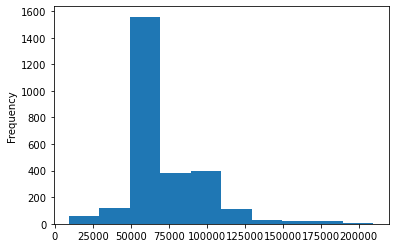

In [284]:
nurse = fosdf2[fosdf2['CIPDESC'] =='Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.']
nurse['EARN_MDN_HI_2YR'].plot.hist()

In [304]:
get_col_info('DEBT_ALL.*MDN$', colsource='sourcep_',  map='program')#GRAD_DEBT_MDN

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata,sourcep_
2405,programs.cip_4_digit.debt.parent_plus.all.all_inst.median,P_DEBT_ALL_PP_ANY_MDN,integer,Median Parent PLUS loan debt disbursed at all institutions,None,None,None,None,None,None,program,None,True,False,DEBT_ALL_PP_ANY_MDN
2420,programs.cip_4_digit.debt.parent_plus.all.eval_inst.median,P_DEBT_ALL_PP_EVAL_MDN,integer,Median Parent PLUS loan debt disbursed at this institution,None,None,None,None,None,None,program,None,True,False,DEBT_ALL_PP_EVAL_MDN
2435,programs.cip_4_digit.debt.staff_grad_plus.all.all_inst.median,P_DEBT_ALL_STGP_ANY_MDN,integer,Median Stafford and Grad PLUS loan debt disbursed at all institutions,integer,None,None,None,None,None,program,None,True,False,DEBT_ALL_STGP_ANY_MDN
2450,programs.cip_4_digit.debt.staff_grad_plus.all.eval_inst.median,P_DEBT_ALL_STGP_EVAL_MDN,integer,Median Stafford and Grad PLUS loan debt disbursed at this institution,None,None,None,None,None,None,program,None,True,False,DEBT_ALL_STGP_EVAL_MDN


In [377]:
print("most common debt level is ${:,.1f}".format(fosdf2[ 'DEBT_ALL_STGP_EVAL_MDN'].mode().squeeze()))
fosdf2[ 'DEBT_ALL_STGP_EVAL_MDN'].describe()

most common debt level is $27,000.0


count     51661.000000
mean      27695.399566
std       24948.079290
min        1510.000000
25%       17201.000000
50%       23500.000000
75%       28150.000000
max      439172.000000
Name: DEBT_ALL_STGP_EVAL_MDN, dtype: float64

<AxesSubplot:ylabel='Frequency'>

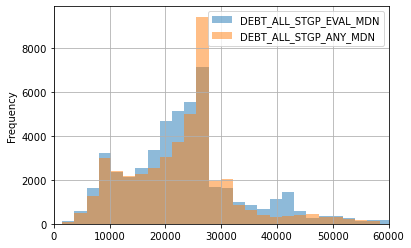

In [369]:
fosdf2[[ 'DEBT_ALL_STGP_EVAL_MDN','DEBT_ALL_STGP_ANY_MDN',]].plot.hist(grid=True, bins=200, alpha=0.5,xlim=(0,60000))# 

<AxesSubplot:ylabel='Frequency'>

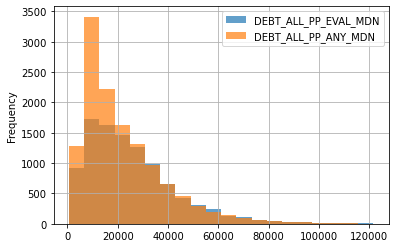

In [370]:
fosdf2[['DEBT_ALL_PP_EVAL_MDN','DEBT_ALL_PP_ANY_MDN', ]].plot.hist(grid=True, alpha=.7, bins=20)

# All Data Fields (Merged)
most recent cohort it labeled 'All-Data-Elements'), files for other years are labeled as MERGEDyyyy-yy

location details for institutions are also in these files (Field of Study shared only OPEID6 and INSTNM)

In [56]:
alldatadf = h.df_from_zipcsv(h.ZIPNAME, 'Most-Recent-Cohorts-All-Data-Elements.csv')
alldatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Columns: 2392 entries, UNITID to DOLPROVIDER
dtypes: float64(2358), int64(14), object(20)
memory usage: 122.2+ MB


In [140]:
#get info about a column
get_col_info('DEATH_YR2_RT')

,id,source,type,description,index,lvl_0,lvl_1,lvl_2,lvl_3,lvl_4,map,calculate,in_FOS,in_alldata
441,completion.title_iv.died_by.2yrs,DEATH_YR2_RT,float,Percent died within 2 years at original institution,None,None,None,None,None,None,None,None,False,True
454,completion.title_iv.low_inc.died_by.2yrs,LO_INC_DEATH_YR2_RT,float,"Percent of low-income (less than $30,000 in nominal family income) students who died within 2 ye...",None,None,None,None,None,None,None,None,False,True
467,completion.title_iv.mid_inc.died_by.2yrs,MD_INC_DEATH_YR2_RT,float,"Percent of middle-income (between $30,000 and $75,000 in nominal family income) students who die...",None,None,None,None,None,None,None,None,False,True
480,completion.title_iv.high_inc.died_by.2yrs,HI_INC_DEATH_YR2_RT,float,"Percent of high-income (above $75,000 in nominal family income) students who died within 2 years...",None,None,None,None,None,None,None,None,False,True
493,completion.title_iv.depend.died_by.2yrs,DEP_DEATH_YR2_RT,float,Percent of dependent students who died within 2 years at original institution,None,None,None,None,None,None,None,None,False,True
506,completion.title_iv.independ.died_by.2yrs,IND_DEATH_YR2_RT,float,Percent of independent students who died within 2 years at original institution,None,None,None,None,None,None,None,None,False,True
519,completion.title_iv.female.died_by.2yrs,FEMALE_DEATH_YR2_RT,float,Percent of female students who died within 2 years at original institution,None,None,None,None,None,None,None,None,False,True
532,completion.title_iv.male.died_by.2yrs,MALE_DEATH_YR2_RT,float,Percent of male students who died within 2 years at original institution,None,None,None,None,None,None,None,None,False,True
545,completion.title_iv.pell_recip.died_by.2yrs,PELL_DEATH_YR2_RT,float,Percent of students who received a Pell Grant at the institution and who died within 2 years at ...,None,None,None,None,None,None,None,None,False,True
558,completion.title_iv.no_pell.died_by.2yrs,NOPELL_DEATH_YR2_RT,float,Percent of students who never received a Pell Grant at the institution and who died within 2 yea...,None,None,None,None,None,None,None,None,False,True


In [72]:
suppressedct = (alldatadf==-1).sum()
print(suppressedct.sum())
suppressedct[suppressedct >0]

6348009


DEATH_YR2_RT             6043
COMP_ORIG_YR2_RT         1220
COMP_4YR_TRANS_YR2_RT    4765
COMP_2YR_TRANS_YR2_RT    2951
WDRAW_ORIG_YR2_RT        1636
                         ... 
LPSTAFFORD_AMT            100
LPPPLUS_CNT              1503
LPPPLUS_AMT              1503
LPGPLUS_CNT              4478
LPGPLUS_AMT              4478
Length: 1719, dtype: int64

In [74]:
alldatadf2 = alldatadf.replace(-1, None)

In [75]:
alldatadf2.describe()

,UNITID,OPEID6,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,...,LPGPLUS_AMT,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
count,6.694000e+03,6694.000000,6288.000000,6694.000000,6694.000000,6694.000000,6694.000000,6694.000000,6694.000000,6694.000000,...,5.080000e+03,3442.000000,2004.000000,2007.000000,3430.000000,3430.000000,3435.000000,2.726000e+03,2.726000e+03,6694.000000
mean,2.264647e+06,16778.675232,1.951654,0.009262,0.789812,3.465790,1.832088,2.224529,2.076337,29.076188,...,7.539454e+07,1271.982568,10319.757485,3187.800698,9825.385423,4108.386297,4095.952547,2.233848e+08,2.329639e+08,0.384374
std,7.878432e+06,14999.312480,0.900427,0.095800,0.407473,8.762958,1.081697,1.373346,0.833519,16.814511,...,1.725407e+08,591.052949,3397.931034,1407.961841,3464.194289,1976.426007,1927.665159,1.430742e+09,1.486335e+09,0.486483
min,1.006540e+05,1002.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,5.417000e+04,0.000000,675.000000,110.000000,820.000000,162.000000,162.000000,0.000000e+00,1.000000e+00,0.000000
25%,1.741405e+05,3069.750000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,...,1.876781e+06,1000.000000,8000.000000,2200.000000,7308.000000,2754.000000,2836.500000,4.069181e+06,4.493719e+06,0.000000
50%,2.286485e+05,10198.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,29.000000,...,1.087477e+07,1200.000000,10190.000000,3024.000000,9503.000000,3804.500000,3923.000000,1.845998e+07,1.905728e+07,0.000000
75%,4.552705e+05,30418.500000,3.000000,0.000000,1.000000,2.000000,3.000000,4.000000,3.000000,42.000000,...,6.652962e+07,1549.750000,12687.250000,3957.500000,11884.000000,5274.000000,4952.000000,7.236205e+07,7.612885e+07,1.000000
max,4.917560e+07,42876.000000,3.000000,1.000000,1.000000,74.000000,4.000000,4.000000,3.000000,78.000000,...,2.608959e+09,8000.000000,21829.000000,10281.000000,29400.000000,19800.000000,13805.000000,3.923374e+10,4.092970e+10,1.000000


In [121]:
alldatadf2.describe(include=np.object)

,OPEID,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,REPAY_DT_MDN,SEPAR_DT_MDN,ALIAS,T4APPROVALDATE,ACCREDCODE,CIPTITLE1,CIPTITLE2,CIPTITLE3,CIPTITLE4,CIPTITLE5,CIPTITLE6,FEDSCHCD
count,6694,6694,6694,6694,6694,6425,6666,6139,5932,5932,2342,6187,6425,2329,1868,1497,1159,843,646,6677
unique,6666,6571,2435,59,5977,42,5697,5271,2,303,2196,3342,42,151,165,163,169,159,152,5623
top,00104700,Stevens-Henager College,New York,CA,00961,Higher Learning Commission,www.empire.edu/,www.empire.edu/net-price-calculator,12/31/2999,12/31/2999,Penn State,12/1/1965,NCACHE,Cosmetology/Cosmetologist General,Aesthetician/Esthetician and Skin Care Specialist,Cosmetology Barber/Styling and Nail Instructor,Cosmetology Barber/Styling and Nail Instructor,Cosmetology Barber/Styling and Nail Instructor,Cosmetology Barber/Styling and Nail Instructor,001459
freq,3,7,85,693,9,1178,82,81,3822,2109,24,1076,1178,961,308,168,144,61,32,73


In [149]:
pd.set_option('display.max_colwidth', 150)
get_col_info('DTRANS')[['source', 'description']]

,source,description
1738,DTRANS_4,Adjusted cohort count for transfer rate at four-year institutions (denominator of 150% transfer rate)
1740,DTRANS_L4,Adjusted cohort count for transfer rate at less-than-four-year institutions (denominator of 150% transfer rate)
1824,DTRANS_4_POOLED,Adjusted cohort count for transfer rate at four-year institutions (denominator of 150% transfer rate)
1825,DTRANS_L4_POOLED,Adjusted cohort count for transfer rate at less-than-four-year institutions (denominator of 150% transfer rate)


In [156]:
[x for x in alldatadf2.columns if 'id' in x.lower()]

['UNITID',
 'OPEID',
 'OPEID6',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'POOLYRS_FTFTAIDPCT',
 'BBRR1_FED_UG_PAIDINFULL',
 'BBRR1_FED_UGCOMP_PAIDINFULL',
 'BBRR1_FED_UGNOCOMP_PAIDINFULL',
 'BBRR1_FED_UGUNK_PAIDINFULL',
 'BBRR1_FED_GR_PAIDINFULL',
 'BBRR1_FED_GRCOMP_PAIDINFULL',
 'BBRR1_FED_GRNOCOMP_PAIDINFULL',
 'BBRR1_PP_UG_PAIDINFULL',
 'BBRR1_PP_UGCOMP_PAIDINFULL',
 'BBRR1_PP_UGNOCOMP_PAIDINFULL',
 'BBRR1_PP_UGUNK_PAIDINFULL',
 'BBRR2_FED_UG_PAIDINFULL',
 'BBRR2_FED_UGCOMP_PAIDINFULL',
 'BBRR2_FED_UGNOCOMP_PAIDINFULL',
 'BBRR2_FED_UGUNK_PAIDINFULL',
 'BBRR2_FED_GR_PAIDINFULL',
 'BBRR2_FED_GRCOMP_PAIDINFULL',
 'BBRR2_FED_GRNOCOMP_PAIDINFULL',
 'BBRR2_PP_UG_PAIDINFULL',
 'BBRR2_PP_UGCOMP_PAIDINFULL',
 'BBRR2_PP_UGNOCOMP_PAIDINFULL',
 'BBRR2_PP_UGUNK_PAIDINFULL',
 'BBRR2_FED_UG_PAIDINFULL_SUPP',
 'BBRR2_FED_UGCOMP_PAIDINFULL_SUPP',
 'DOLPROVIDER']

In [153]:
i = 0
alldatadf2.columns[i], alldatadf2.dtypes[i]

('UNITID', dtype('int64'))

In [157]:
instinfo = alldatadf2[['OPEID', 'OPEID6','INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL', 'NPCURL', ]]
instinfo.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 0 to 6693
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   OPEID    6694 non-null   object
 1   OPEID6   6694 non-null   int64 
 2   INSTNM   6694 non-null   object
 3   CITY     6694 non-null   object
 4   STABBR   6694 non-null   object
 5   ZIP      6694 non-null   object
 6   INSTURL  6666 non-null   object
 7   NPCURL   6139 non-null   object
dtypes: int64(1), object(7)
memory usage: 470.7+ KB


In [172]:
instinfo.query("INSTNM == 'Stevens-Henager College'")

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,NPCURL
3400,00367400,3674,Stevens-Henager College,West Haven,UT,84401,www.stevenshenager.edu/,https://stevenshenager.studentaidcalculator.com/
3401,00367401,3674,Stevens-Henager College,Orem,UT,84058,www.stevenshenager.edu/,www.stevenshenager.edu/net-price-calculator
4472,00367403,3674,Stevens-Henager College,Murray,UT,84123-5671,www.stevenshenager.edu/,https://www.stevenshenager.edu/net-price-calculator
4753,00367405,3674,Stevens-Henager College,Logan,UT,84321,www.stevenshenager.edu/,www.stevenshenager.edu/net-price-calculator
5271,00367406,3674,Stevens-Henager College,Boise,ID,83709-6733,www.stevenshenager.edu/,www.stevenshenager.edu/net-price-calculator
5385,03120302,31203,Stevens-Henager College,Idaho Falls,ID,83402,www.stevenshenager.edu/,www.stevenshenager.edu/net-price-calculator
5471,00367411,3674,Stevens-Henager College,St. George,UT,84790-2111,www.stevenshenager.edu/locations/st-george,www.stevenshenager.edu/net-price-calculator


In [173]:
instinfo.to_sql('instinfo', db, index=False, if_exists='replace')

In [168]:
alldatadf2['INSTNM'].value_counts()

Stevens-Henager College                        7
Columbia College                               5
Brittany Beauty Academy                        4
Unitek College                                 4
Arthur's Beauty College                        4
                                              ..
Franklin and Marshall College                  1
Aveda Arts & Sciences Institute-San Antonio    1
Southern Careers Institute-Waco                1
Atlanta Technical College                      1
Kettering College                              1
Name: INSTNM, Length: 6571, dtype: int64

In [122]:
alldatadf2['STABBR'].value_counts()

CA    693
NY    455
TX    433
FL    378
PA    353
OH    289
IL    258
MI    192
NC    179
GA    175
VA    168
NJ    168
MO    158
MA    156
TN    155
PR    144
IN    139
LA    121
AZ    114
MN    112
OK    108
WA    105
CO    101
SC    100
WI     95
AR     92
KY     90
AL     89
MD     85
KS     80
IA     80
CT     79
OR     78
WV     73
UT     71
MS     59
NM     49
NE     42
NV     38
ME     38
ID     38
NH     37
MT     32
SD     28
ND     26
DC     25
RI     23
VT     22
HI     21
DE     21
WY     10
AK      9
GU      3
VI      2
FM      1
AS      1
MH      1
MP      1
PW      1
Name: STABBR, dtype: int64

In [130]:
alldatadf2.query("STABBR == 'NJ' and CITY == 'Ewing'")

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
2025,187134,00264200,2642,The College of New Jersey,Ewing,NJ,08628-7718,Middle States Commission on Higher Education,https://www.tcnj.edu/,https://netprice.tcnj.edu/,...,002642,1200.0,14048.0,3922.0,14048.0,3922.0,6192.0,39606000.0,46208000.0,0
6101,492731,04218501,42185,Innovate Salon Academy,Ewing,NJ,08628-0000,National Accrediting Commission of Career Arts and Sciences,innovatesalonacademy.com/,https://www.innovatesalonacademy.com/net-price-calc.html,...,042185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [138]:
alldatadf2.dtypes['OPEID6'], fosdf.dtypes['OPEID6']

(dtype('int64'), dtype('int64'))

In [335]:
get_col_info('tuit',)[['source', 'description', 'map']]

,source,description,map
378,TUITIONFEE_IN,In-state tuition and fees,None
379,TUITIONFEE_OUT,Out-of-state tuition and fees,None
380,TUITIONFEE_PROG,Tuition and fees for program-year institutions,None
381,TUITFTE,Net tuition revenue per full-time equivalent student,None


In [337]:
alldatadf2.groupby('INSTNM')['TUITFTE'].mean().sort_values(ascending=False,).head(10)

INSTNM
SIT Graduate Institute                               440373.0
National American University-Kings Bay               257162.0
California International Business University         135917.0
Mauna Loa Helicopters                                118811.0
Schiller International University                    109401.0
Pennsylvania State University-College of Medicine    103454.0
Maine Media College                                   90461.0
L3Harris                                              87077.0
Bank Street College of Education                      75374.0
Ottawa University-Online                              72427.0
Name: TUITFTE, dtype: float64

In [338]:
alldatadf2.groupby('INSTNM')['TUITIONFEE_PROG'].mean().sort_values(ascending=False,).head(10)

INSTNM
Shepherds College                               123200.0
Gemini School of Visual Arts & Communication     88000.0
Brookline College-Phoenix                        85000.0
L3Harris                                         80145.0
Glendale Career College                          71838.0
Glendale Career College-Brightwood Teachout      71838.0
Career Networks Institute                        71788.0
Nightingale College                              69750.0
California Career College                        67000.0
San Joaquin Valley College - San Diego           57150.0
Name: TUITIONFEE_PROG, dtype: float64

In [341]:
nj = alldatadf2.query("STABBR == 'NJ'")

In [345]:
nj.groupby('INSTNM')['TUITIONFEE_IN'].mean().dropna().sort_values(ascending=False,).tail(10)

INSTNM
Raritan Valley Community College                   4852.0
Hudson County Community College                    4814.0
Rowan College at Burlington County                 4730.0
Mercer County Community College                    4669.0
Ocean County College                               4575.0
Bergen Community College                           4573.0
Rowan College of South Jersey Gloucester Campus    4560.0
Cumberland County College                          4560.0
Camden County College                              4320.0
Middlesex County College                           3564.0
Name: TUITIONFEE_IN, dtype: float64

In [351]:
alldatadf2.query('OPEID6 == @tcnj_opeid6')[['INSTNM','TUITIONFEE_IN']]

,INSTNM,TUITIONFEE_IN
2025,The College of New Jersey,16923.0
